# Filtered Derivative action

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

## System

In [2]:
# Definition
num1 = [1]
den1 = [1, 7, 12, 0]

G = ct.tf(num1, den1)
print('Plant:')
print(G)

Plant:

        1
------------------
s^3 + 7 s^2 + 12 s



## PID controller

In [8]:
# Parámeters
tsim = 12
dt = 0.005

t = np.arange(0, tsim, dt)
R = np.ones(len(t))

### Non-filtered

In [9]:
Kp = 50.4000
Ti = 0.9069
Td = 0.2267

P = ct.tf([Kp],[1])
I = ct.tf([Kp],[Ti,0])
D = ct.tf([Kp*Td, 0],[0.000001,1]) 

Gc = P + I + D

_, C1 = ct.forced_response(ct.feedback(Gc*G),t,R)
_, U1 = ct.forced_response(ct.feedback(Gc,G),t,R)

### Filtered

In [14]:
N = 2
Tf = Td/N

P = ct.tf([Kp],[1])
I = ct.tf([Kp],[Ti,0])
D = ct.tf([Kp*Td, 0],[Tf, 1]) 

Gc = P + I + D

_, C2 = ct.forced_response(ct.feedback(Gc*G),t,R)
_, U2 = ct.forced_response(ct.feedback(Gc,G),t,R)

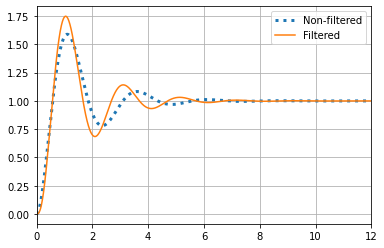

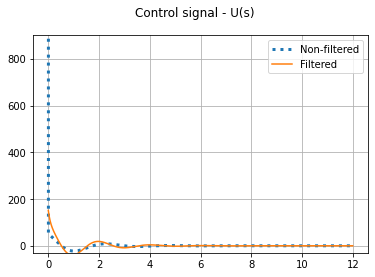

In [15]:
plt.plot(t, C1, ':', linewidth =3, label = "Non-filtered")
plt.plot(t, C2, label = "Filtered")
plt.legend()
plt.xlim((0, tsim))
plt.grid()

plt.figure()
plt.plot(t, U1, ':', linewidth =3, label = "Non-filtered")
plt.plot(t, U2, label="Filtered")
plt.suptitle("Control signal - U(s)")
plt.legend()
plt.ylim((-30,900))
plt.grid()